In [1]:
# Dependencies and Setup
import pandas as pd

In [10]:
# !pip install chart_studio
# !pip install matplotlib
# !pip install plotly
# !pip install numpy
# !pip install seaborn

In [11]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import plotly.tools as tls
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns 
from chart_studio import plotly as py
from plotly.offline import iplot

%matplotlib inline

In [2]:
# File to Load (Remember to change the path if needed.)
lax_clean_file_name2load = "./Resources/output/lax_temp_fin_rs_ml.csv"

# Read the School Data and Student Data and store into a Pandas DataFrame
lax_temp_fin_rs_ml_df = pd.read_csv(lax_clean_file_name2load)
lax_temp_fin_rs_ml_df.describe()

,AvgTemperature,Population,lat,lon,Wk avg 1-hour SO2 Conc ppb,Wk avg PM10 Conc ug/m3 SC,Wk avg PM2.5 Conc ug/m3 LC,Wk avg NO2 Conc
count,1045.000000,1.045000e+03,1.045000e+03,1.045000e+03,1045.000000,1045.000000,1045.000000,1045.000000
mean,62.855254,1.214150e+07,3.413650e+01,-1.179239e+02,3.033143,27.846165,14.590701,35.391611
std,5.388299,2.081797e+05,3.625503e-13,1.521290e-12,2.020679,8.676366,5.958714,11.680043
min,50.128571,1.179800e+07,3.413650e+01,-1.179239e+02,0.200000,6.931034,5.214912,12.969672
25%,58.700000,1.197800e+07,3.413650e+01,-1.179239e+02,1.476190,22.130435,10.623529,26.818966
50%,62.600000,1.216000e+07,3.413650e+01,-1.179239e+02,2.402439,28.098039,13.320690,34.871569
75%,66.914286,1.234500e+07,3.413650e+01,-1.179239e+02,4.162162,33.000000,16.900000,42.584615
max,78.357143,1.245800e+07,3.413650e+01,-1.179239e+02,13.369565,91.090909,64.045946,88.660870


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
# X = lax_temp_fin_rs_ml_df[['Population','lat','lon','Wk avg 1-hour SO2 Conc ppb','Wk avg PM10 Conc ug/m3 SC','Wk avg PM2.5 Conc ug/m3 LC','Wk avg NO2 Conc','Wk avg 8-hour CO Conc']]
X = lax_temp_fin_rs_ml_df[['Population','lat','lon','Wk avg 1-hour SO2 Conc ppb','Wk avg PM10 Conc ug/m3 SC','Wk avg PM2.5 Conc ug/m3 LC','Wk avg NO2 Conc']]
y = lax_temp_fin_rs_ml_df['AvgTemperature']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
# mdl = LogisticRegression(max_iter=10000)
# mdl.fit(X_train, y_train)
# print(f"Training Data Score: {mdl.score(X_train, y_train)}")
# print(f"Testing Data Score: {mdl.score(X_test, y_test)}")
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

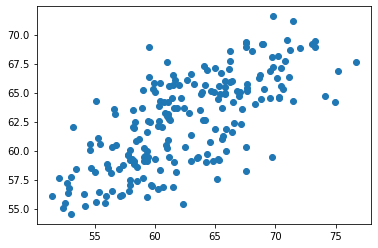

In [26]:
pred_rf = rf.predict(X_test)
plt.scatter(y_test, pred_rf)

In [27]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.9222301181798322
Testing Data Score: 0.49492397132614396
